In [102]:
import sbibm
import torch
import matplotlib.pyplot as plt

task = sbibm.get_task("two_moons")
prior = task.get_prior()
observation = task.get_observation(num_observation=3)

In [103]:
log_prob_fn = task._likelihood

In [104]:
def generalized_likelihood(theta):
    resolution = 200
    x_dim1 = torch.linspace(-1, 1, resolution)
    x_dim2 = torch.linspace(-1.5, 1.5, resolution)
    x, y = torch.meshgrid(x_dim1, x_dim2)
    xy = torch.stack([x, y])
    xy = torch.reshape(xy, (2, resolution**2)).T
    repeated_theta = theta.repeat((resolution**2, 1))
    likelihoods = log_prob_fn(repeated_theta, xy).exp()
    distances = torch.exp(-1000.0*torch.mean((xy - observation)**2, dim=1))
    integrand = likelihoods * distances
    integral = torch.sum(integrand)
    return integral

In [105]:
theta_resolution = 100
theta1 = torch.linspace(-1, 1, theta_resolution)
theta2 = torch.linspace(-1, 1, theta_resolution)
x, y = torch.meshgrid(theta1, theta2)
thetas = torch.stack([x, y])
thetas = torch.reshape(thetas, (2, theta_resolution**2)).T

ls = []
for theta in thetas:
    ls.append(generalized_likelihood(theta))

In [106]:
ls = torch.stack(ls)
ls = torch.reshape(ls, (theta_resolution, theta_resolution))

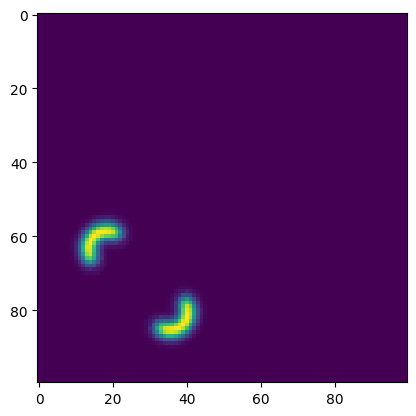

In [107]:
_ = plt.imshow(ls.numpy())